# Projet-2

Groupe : Simon, Brenton, Edward

Cours : Algèbre Linéaire

Date : Dimanche 4 Juin 2023

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random

## Exercice 3-2

Ecrire un algorithme qui prend un argument des points de $\mathbb{R}^2$ est qui trace ces points ainsi que leur enveloppe convexe.

In [169]:
def produit_vectoriel_2d(a, b):     # produit vectoriel
    return a[0]*b[1] - a[1]*b[0]

def dist(a, b):   # distance entre a et b
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def angle(a, b):  # angle entre a et b 
    return np.arctan2(b[1]-a[1], b[0]-a[0])

def enveloppe2D(points):
    p0 = min(points, key=lambda p: p[1])    # trouver le point avec la plus petite coordonnée Y
    
    sorted_points = sorted(points, key=lambda p: angle(p0, p))
    
    stack = [sorted_points[0], sorted_points[1]]
    
    for p in sorted_points[2:]:   # déterminer si les points sont dans l'enveloppe convexe
        while len(stack) > 1 and produit_vectoriel_2d((stack[-1][0]-stack[-2][0], stack[-1][1]-stack[-2][1]), 
                                        (p[0]-stack[-2][0], p[1]-stack[-2][1])) < 0:
            stack.pop()
        stack.append(p)
        
    return stack

def question2(points):  
    
    hull = enveloppe2D(points)      

    fig, ax = plt.subplots()
    ax.scatter(points[:, 0], points[:, 1])
    for i in range(len(hull)):
        ax.plot([hull[i][0], hull[(i+1)%len(hull)][0]], [hull[i][1], hull[(i+1)%len(hull)][1]], 'r')
    plt.show()


Les points sont: [[7 4]
 [7 4]
 [0 2]
 [8 5]
 [5 9]
 [8 6]
 [2 3]]


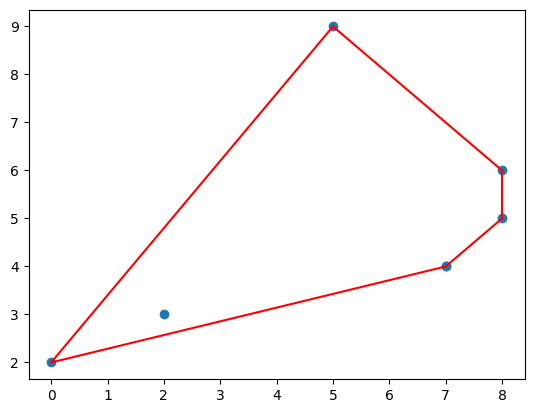

In [170]:
points = np.random.randint(0, 10, size=(7, 2))
print(f"Les points sont: {points}")
question2(points)

## Exercice 3-3

Ecrire un algorithme qui prend en argument des points de $\mathbb{R}^3$ est qui trace ces points ainsi que leur enveloppe convexe, et faire en sorte à ce qu'on puisse faire bouger l'image (pour pouvoir voir toutes les faces de l'enveloppe convexe).

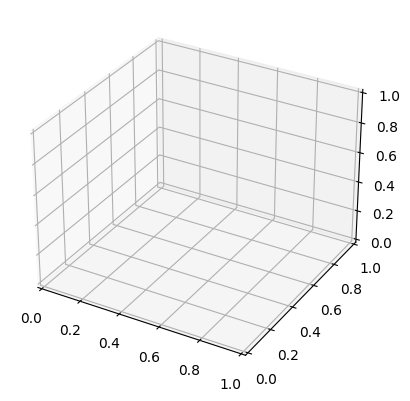

In [134]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [181]:
def create_points_random(number_of_points=10, radius_maximum=10):
    """
    Créer des points aléatoires dans un espace 3D
    """
    
    List_x = [random.uniform(0, radius_maximum) for k in range(number_of_points)]
    List_y = [random.uniform(0, radius_maximum) for k in range(number_of_points)]
    List_z = [random.uniform(0, radius_maximum) for k in range(number_of_points)]

    return List_x, List_y, List_z
    
points_coors = create_points_random(5, 5)
coor_label = ["x", "y", "z"]
for coor, coor_label in zip(points_coors, coor_label):
    print(f"Les coordonnées {coor_label} sont: {coor}")

Les coordonnées x sont: [2.2192176902821004, 3.2744029469374687, 3.8892214804865226, 0.312567049876849, 1.555006355245156]
Les coordonnées y sont: [0.8297185674269303, 2.029010286705439, 4.856451546536638, 3.4865880196540844, 2.7372951639856478]
Les coordonnées z sont: [3.5646214860510694, 4.539579935286792, 2.645026612192794, 3.1118942887535255, 2.935795768075064]


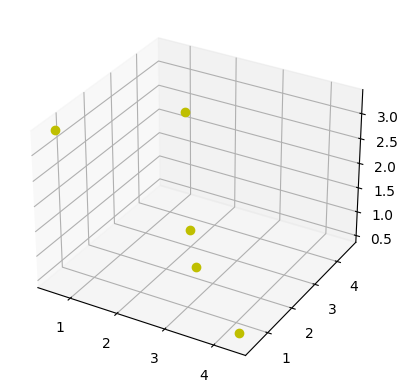

In [177]:
def plot_the_points(points_coor):
    """
    Plot les points dans un espace 3D
    """
    
    plt.plot(points_coor[0], points_coor[1], points_coor[2], 'yo')
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_the_points(points_coor)

In [173]:
def produit_vectoriel_3D(a, b):    # Produict vectoriel dans 3D
    return [a[1]*b[2] - a[2]*b[1],
            a[2]*b[0] - a[0]*b[2],
            a[0]*b[1] - a[1]*b[0]]

def produit_scalaire_3D(a, b):    # Produict scalaire dans 3D
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

produit_vectoriel_3D([1, 2, 3], [4, 5, 6])

[-3, 6, -3]

In [327]:
def enveloppe_3D(points_coors):
    """
    Trouver l'enveloppe convexe des points dans un espace 3D
    """
    
    triangles = []
    
    x_coors = points_coors[0]; y_coors = points_coors[1]; z_coors = points_coors[2]
    assert len(x_coors) == len(y_coors) == len(z_coors), "Les points ne sont pas dans le même espace"
    
    point_num = len(x_coors)

    # print(f"Les points sont: {len(points_coors)}")
    for index1 in range(point_num):
        for index2 in range(point_num):
            if not index1 == index2:
                for index3 in range(point_num):
                    if not index1 == index3 and not index2 == index3:
                        status_1 = True; status_2 = True 
                        
                        difference_1 = [x_coors[index2] - x_coors[index1],
                                        y_coors[index2] - y_coors[index1],
                                        z_coors[index2] - z_coors[index1]]
                        
                        difference_2 = [x_coors[index3] - x_coors[index1],
                                        y_coors[index3] - y_coors[index1],
                                        z_coors[index3] - z_coors[index1]]
                        
                        pro_vec = produit_vectoriel_3D(difference_1, difference_2)
                        
                        for index4 in range(point_num):
                            if not index4 == index1 and not index4 == index2 and not index4 == index3:
                                difference_3 = [x_coors[index4] - x_coors[index1],
                                                y_coors[index4] - y_coors[index1],
                                                z_coors[index4] - z_coors[index1]]
                                
                                pro_scal = produit_scalaire_3D(pro_vec, difference_3)
                                
                                if pro_scal < 0:
                                    status_1 = False
                                elif pro_scal > 0:
                                    status_2 = False
                                    
                        if (status_1 or status_2) and pro_vec:
                            triangles.append([[x_coors[index1], y_coors[index1], z_coors[index1]],
                                              [x_coors[index2], y_coors[index2], z_coors[index2]],
                                              [x_coors[index3], y_coors[index3], z_coors[index3]]])
                        
    return triangles
    
                     
triangles = enveloppe_3D(points_coors)       
triangles

[[[2.2192176902821004, 0.8297185674269303, 3.5646214860510694],
  [3.2744029469374687, 2.029010286705439, 4.539579935286792],
  [3.8892214804865226, 4.856451546536638, 2.645026612192794]],
 [[2.2192176902821004, 0.8297185674269303, 3.5646214860510694],
  [3.2744029469374687, 2.029010286705439, 4.539579935286792],
  [0.312567049876849, 3.4865880196540844, 3.1118942887535255]],
 [[2.2192176902821004, 0.8297185674269303, 3.5646214860510694],
  [3.8892214804865226, 4.856451546536638, 2.645026612192794],
  [3.2744029469374687, 2.029010286705439, 4.539579935286792]],
 [[2.2192176902821004, 0.8297185674269303, 3.5646214860510694],
  [3.8892214804865226, 4.856451546536638, 2.645026612192794],
  [1.555006355245156, 2.7372951639856478, 2.935795768075064]],
 [[2.2192176902821004, 0.8297185674269303, 3.5646214860510694],
  [0.312567049876849, 3.4865880196540844, 3.1118942887535255],
  [3.2744029469374687, 2.029010286705439, 4.539579935286792]],
 [[2.2192176902821004, 0.8297185674269303, 3.56462148

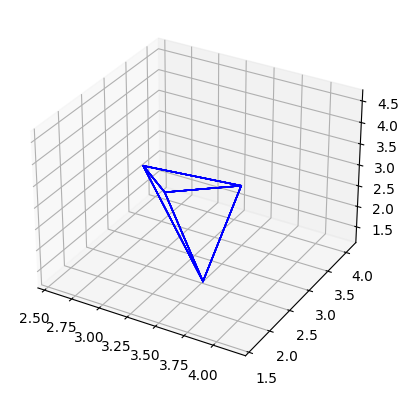

In [297]:
def draw_lines(triangles):
    for triangle in triangles:
        point1, point2, point3 = triangle

        plt.plot([point1[0], point2[0], point3[0], point1[0]],
                 [point1[1], point2[1], point3[1], point1[1]],
                 [point1[2], point2[2], point3[2], point1[2]], "b", linewidth=1)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_lines(triangles)

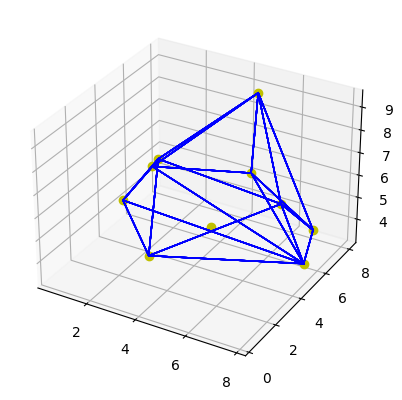

In [330]:
def question3(points=None):
    if not points:
        points_coors = create_points_random(10, 10)
        

        
    plot_the_points(points_coors)
    triangles = enveloppe_3D(points_coors)

    draw_lines(triangles)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
question3()

Une chose très très importante, les fichiers ipynb ne peuvent générer que des fichiers statiques sur nos ordinateurs, donc si vous souhaitez tourner librement des images en trois dimensions, veuillez exécuter le fichier question 3-3.py qui se trouve dans le même dossier.

$$
\text{Auteurs : Simon, Brenton, Edward}
$$

$$
\text{Merci pour votre attention !!}
$$